# Import

In [83]:
import pandas as pd
from pathlib import  Path
import  matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Path and Read File

In [84]:
DATA_DIR=Path("../data/houseprice.csv")
data=pd.read_csv(DATA_DIR)
data

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


# Data Cleaning

In [85]:
def extract_neighborhood(address):
    parts = address.split(',')
    if len(parts) > 0:
        return parts[0].strip()
    else:
        return 0

In [86]:
data["Area"]=pd.to_numeric(data["Area"],errors='coerce')
data["Area"]=data["Area"].dropna()
data["Area"]=data["Area"].astype(float)
df_area=data["Area"]
Q1=df_area.quantile(0.25)
Q3=df_area.quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_clean=data[(data["Area"] >= lower_bound) & (data["Area"] <= upper_bound)]


data_clean=data_clean.dropna()
data_clean = data_clean.drop("Price",axis=1)

# data_clean["Address"]=data_clean["Address"].apply(lambda x:extract_neighborhood(x))
# data_clean=pd.get_dummies(data_clean,columns=["Address"])


addresses=data_clean["Address"]
neighborhoods = [extract_neighborhood(addr) for addr in addresses]
le = LabelEncoder()
neighborhoods_encoded = le.fit_transform(neighborhoods)

data_clean["Address"]=neighborhoods_encoded
data_clean["Parking"]=data_clean["Parking"].astype(int)
data_clean["Warehouse"]=data_clean["Warehouse"].astype(int)
data_clean["Elevator"]=data_clean["Elevator"].astype(int)
data_clean

,Area,Room,Parking,Warehouse,Elevator,Address,Price(USD)
0,63.0,1,1,1,1,152,61666.67
1,60.0,1,1,1,1,152,61666.67
2,79.0,2,1,1,1,113,18333.33
3,95.0,2,1,1,1,148,30083.33
4,123.0,2,1,1,1,146,233333.33
...,...,...,...,...,...,...,...
3474,86.0,2,1,1,1,159,116666.67
3475,83.0,2,1,1,1,101,226666.67
3476,75.0,2,0,0,0,111,12166.67
3477,105.0,2,1,1,1,37,186666.67


# Train and Test

In [87]:
data_y=data_clean["Price(USD)"]
data_x=data_clean.drop("Price(USD)",axis=1)
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=101)

# Model fit

In [88]:
model = LinearRegression()

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [89]:
predictions = model.predict(X_test)
predictions


array([ 1.63506517e+05,  1.70250347e+05,  1.43062173e+05,  1.83248848e+05,
        3.26948441e+04,  3.35367900e+04,  2.34494487e+05,  6.19331265e+04,
       -3.72951863e+04,  5.18728436e+04,  1.15242186e+05,  2.97787674e+04,
        1.04845636e+05,  1.44643953e+05,  3.38330839e+05,  1.54935202e+05,
        3.59302164e+05,  1.53355671e+05,  2.43479309e+04,  7.05066914e+04,
        1.00736606e+05,  1.67101526e+05,  4.63948877e+04, -2.70345390e+04,
        1.38321331e+05,  1.39514754e+05,  1.47840365e+05,  4.77655934e+04,
        1.72461690e+05,  6.82615701e+04,  4.39027393e+04,  1.83248848e+05,
        5.39465040e+04,  4.38450272e+04,  1.15242186e+05,  7.04257935e+04,
        1.07761242e+05,  6.12525053e+03,  6.21810809e+04,  3.07911153e+05,
        8.33131703e+04,  1.16330307e+05,  9.24811971e+04,  2.86936949e+04,
        3.79995463e+04,  5.08553944e+04,  7.35301777e+04,  3.46654671e+05,
        4.02833403e+04,  2.52306751e+05,  4.99453547e+04,  1.18614101e+05,
        1.57041243e+05,  

In [72]:
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  7587366591.709389
mean_absolute_error :  57583.45332966066


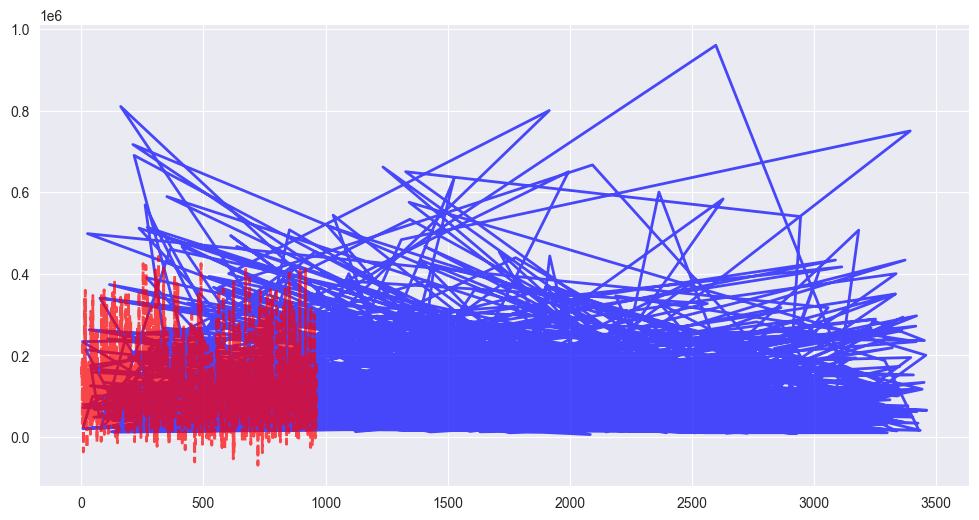

In [93]:
plt.figure(figsize=(12, 6))
# plt.plot(y_test, 'b-', label='Actual (Real Data)', alpha=0.7, linewidth=2)
# plt.plot(predictions, 'r--', label='Predicted', alpha=0.7, linewidth=2)